In [187]:
import tokenize
from string import punctuation

import pandas as pd

reviews = pd.read_csv('data/b2w.csv')  # Load the evaluation data 
reviews.head()  # Display the first few rows of the dataset  

original_index  \
0           11955   
1           35478   
2          122760   
3           17114   
4           19112   

                                                                                                                                                                                           review_text  \
0                                                                                                  Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar   
1                                                                                                                                       Produto excepcional!  recomendo!!! inovador e gostoso de ler!!   
2                                           recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto   
3  Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.   
4                                                                    Além de higiênico tem o tamanho ideal. Só faltou colher e garfo de sobremesa. Talvez se viesse com  mais peças, eu gostaria mais.   

                                                                                                                                                                                 review_text_processed  \
0                                                                                                  bem macio e felpudo...recomendo.  preco imbativel e entrega rapida. compraria outro quando precisar   
1                                                                                                                                       produto excepcional!  recomendo!!! inovador e gostoso de ler!!   
2                                           recebi o produto antes do prazo mas veio com defeito na trava ou seja nao da para usar e ate agora a americanas nao resolveu e preciso muito deste produto   
3  bom custo beneficio. adequado para pessoas que fazem um uso casual do aparelho . a maquina fotografica e excelente . a tela fornece imagens otimas . os recursos do aparelho sao faceis de manejar.   
4                                                                    alem de higienico tem o tamanho ideal. so faltou colher e garfo de sobremesa. talvez se viesse com  mais pecas, eu gostaria mais.   

                                                                                                                                                                                                                                                        review_text_tokenized  \
0                                                                                                                                             ['bem', 'macio', 'felpudo', 'recomendo', 'preco', 'imbativel', 'entrega', 'rapida', 'compraria', 'outro', 'quando', 'precisar']   
1                                                                                                                                                                                                 ['produto', 'excepcional', 'recomendo', 'inovador', 'gostoso', 'de', 'ler']   
2                                           ['recebi', 'produto', 'antes', 'do', 'prazo', 'mas', 'veio', 'com', 'defeito', 'na', 'trava', 'ou', 'seja', 'nao', 'da', 'para', 'usar', 'ate', 'agora', 'americanas', 'nao', 'resolveu', 'preciso', 'muito', 'deste', 'produto']   
3  ['bom', 'custo', 'beneficio', 'adequado', 'para', 'pessoas', 'que', 'fazem', 'um', 'uso', 'casual', 'do', 'aparelho', 'maquina', 'fotografica', 'excelente', 'tela', 'fornece', 'imagens', 'otimas', 'os', 'recursos', 'do', 'aparelho', 'sao', 'faceis', 'de', 'manejar']   
4                                                                                    

In [188]:
reviews = reviews.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis=1)  # Remove rows with missing values

In [189]:
reviews.head()  # Display the first few rows of the updated dataset

review_text  \
0                                                                                                  Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar   
1                                                                                                                                       Produto excepcional!  recomendo!!! inovador e gostoso de ler!!   
2                                           recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto   
3  Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.   
4                                                                    Além de higiênico tem o tamanho ideal. Só faltou colher e garfo de sobremesa. Talvez se viesse com  mais peças, eu gostaria mais.   

   polarity  
0       1.0  
1       1.0  
2       0.0  
3       1.0  
4       NaN

In [190]:
reviews.dropna(inplace=True, axis = 0) # Remove rows with missing values --> inplace=True modifies the dataframe in place, so we dont need to create a new variable
reviews.head()  # Display the first few rows of the updated dataset

review_text  \
0                                                                                                  Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar   
1                                                                                                                                       Produto excepcional!  recomendo!!! inovador e gostoso de ler!!   
2                                           recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto   
3  Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.   
5                                                                                                                 ótmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom   

   polarity  
0       1.0  
1       1.0  
2       0.0  
3       1.0  
5       1.0

In [191]:
reviews["polarity"].value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

In [192]:
from sklearn.model_selection import train_test_split

train, test, train_class, test_class = train_test_split(reviews.review_text, reviews.polarity, random_state=42, stratify=reviews.polarity)

In [193]:
# We need to preprocess the text to convert it into numerical features.
# Here is an example of how to use CountVectorizer to convert text into numerical features.
from sklearn.feature_extraction.text import CountVectorizer

text = ["This is a sample text.", "Another sample text.", "This is another sample text."]
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(text)

sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vectorizer.get_feature_names_out())
sparse_matrix

another  is  sample  text  this
0        0   1       1     1     1
1        1   0       1     1     0
2        1   1       1     1     1

In [194]:
# Let's apply it to our dataset.
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(reviews.review_text)
bag_of_words.shape

(116058, 50508)

In [195]:
# Limit the number of features to improve performance.
vectorizer = CountVectorizer(max_features=100)
bag_of_words = vectorizer.fit_transform(reviews.review_text)
bag_of_words.shape

(116058, 100)

In [196]:
train, test, train_class, test_class = train_test_split(
    bag_of_words, 
    reviews.polarity, 
    stratify=reviews.polarity,
    random_state=42, 
)

logistic_regression = LogisticRegression()
logistic_regression.fit(train, train_class)
accuracy = logistic_regression.score(test, test_class)
accuracy

0.8881268309495088

In [197]:
def train_model(data, text_column, sentiment_column):
    vectorizer = CountVectorizer(max_features=100)
    bag_of_words = vectorizer.fit_transform(reviews[text_column])

    train, test, train_class, test_class = train_test_split(
        bag_of_words,
        reviews.polarity,
        stratify=reviews[sentiment_column],
        random_state=42,
    )


    logistic_regression = LogisticRegression()
    logistic_regression.fit(train, train_class)
    return logistic_regression.score(test, test_class)

In [198]:
train_model(reviews, "review_text", "polarity")

0.8881268309495088

# Word CLoud


In [199]:
from wordcloud import WordCloud

# Create an array with all the reviews
all_evaluation = [text for text in reviews.review_text]

# join the reviews into one string
all_words = ' '.join(all_evaluation)

# total number of words of all reviews
len(all_words)

16570763

In [200]:
word_cloud = WordCloud().generate(all_words)

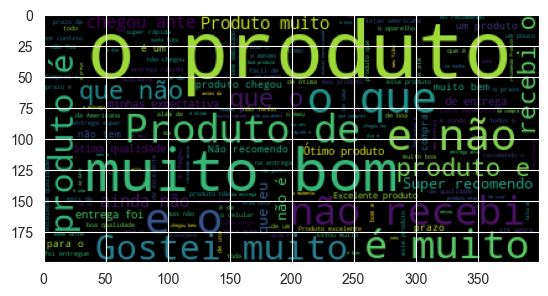

In [201]:
# Display the generated word cloud using matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(word_cloud)

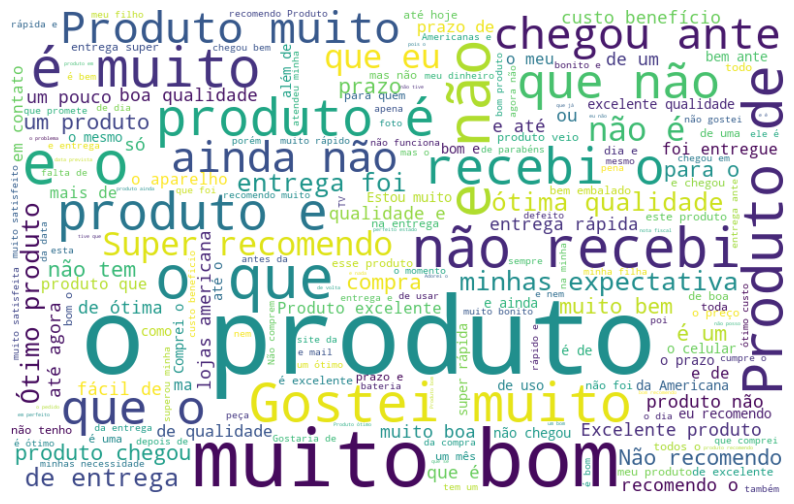

In [202]:
word_cloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white").generate(all_words)

# Display the generated word cloud using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.axis("off") # removes the numbering on the axes
plt.imshow(word_cloud, interpolation='bilinear') #interpolation: method used to interpolate between pixels and produce a smooth image

In [203]:
def word_cloud_negative(data, text_column):
    # Create an array with all the negative reviews
    negative_text = data.query("polarity == 0")
    
    all_evaluation = [text for text in negative_text[text_column]]
    all_words = ' '.join(all_evaluation)
    word_cloud = WordCloud(
        width=800, 
        height=500, 
        max_font_size=110,
        collocations=False, # Displayes only single words, not pairs of words ("the product", "is not", "product is")
        background_color="white"
    ).generate(all_words)
    
    plt.figure(figsize=(10,7))
    plt.axis("off")
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.show()
    

In [204]:
def word_cloud_positive(data, text_column):
    # Create an array with all the positive reviews
    positive_text = data.query("polarity == 1")
    
    all_evaluation = [text for text in positive_text[text_column]]
    all_words = ' '.join(all_evaluation)
    word_cloud = WordCloud(
        width=800, 
        height=500, 
        max_font_size=110,
        collocations=False, # Displayes only single words, not pairs of words ("the product", "is not", "product is")
        background_color="white"
    ).generate(all_words)
    
    plt.figure(figsize=(10,7))
    plt.axis("off")
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.show()

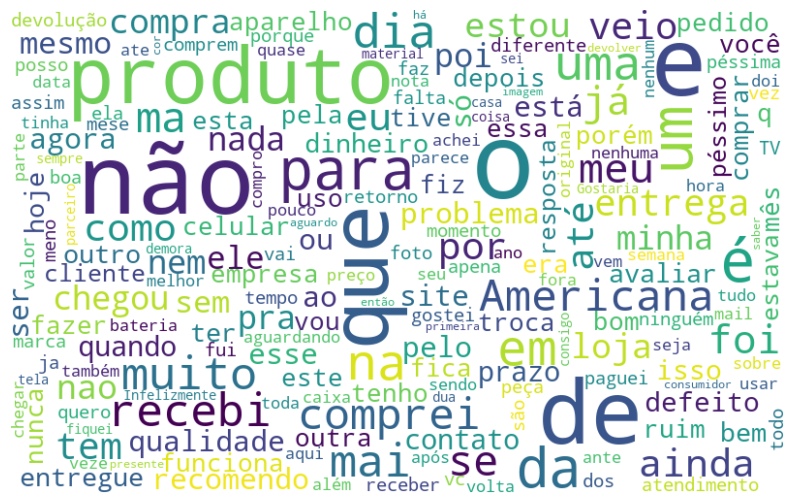

In [205]:
word_cloud_negative(reviews, "review_text")
# The image shows a lot of stop words which are not interesting and don't contribute much to the sentiment of the reviews.'

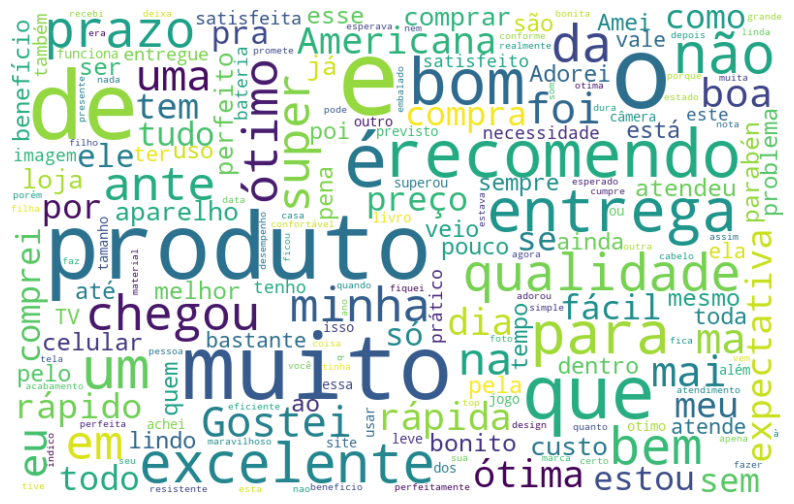

In [206]:
word_cloud_positive(reviews, "review_text")
# The image shows a lot of stop words which are not interesting and don't contribute much to the sentiment of the reviews.'

## Removing Stop Words with NLTK


In [207]:
import ssl
import nltk

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/danielklotz/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/danielklotz/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/danielklotz/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/danielklotz/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/danielklotz/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is a

True

In [208]:
corpus = ["This is a sample text.", "Another sample text.", "This is one more sample text."]
frequency_dist = nltk.FreqDist(corpus)
frequency_dist  

FreqDist({'This is a sample text.': 1, 'Another sample text.': 1, 'This is one more sample text.': 1})

In [209]:
from nltk import tokenize
phrase = "This is a sample text"
token_by_whitespace = tokenize.WhitespaceTokenizer()
token_phrase = token_by_whitespace.tokenize(phrase)
token_phrase

['This', 'is', 'a', 'sample', 'text']

In [210]:
token_by_whitespace = tokenize.WhitespaceTokenizer()
token_dataset = token_by_whitespace.tokenize(all_words)
frequency_dist = nltk.FreqDist(token_dataset)
frequency_dist

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [211]:
dataframe_frequency_dist = pd.DataFrame({"Word": list(frequency_dist.keys()), "Frequency": list(frequency_dist.values())})
dataframe_frequency_dist.head()


Word  Frequency
0                   Bem        413
1                 macio        216
2                     e      89308
3  felpudo...recomendo.          1
4                 Preço        334

In [212]:
dataframe_frequency_dist.nlargest(columns="Frequency", n=10)

Word  Frequency
2         e      89308
20        o      76053
17       de      75791
39        a      66640
50      que      53574
33      não      44253
23       do      36776
43    muito      36566
60        é      36314
21  produto      34983

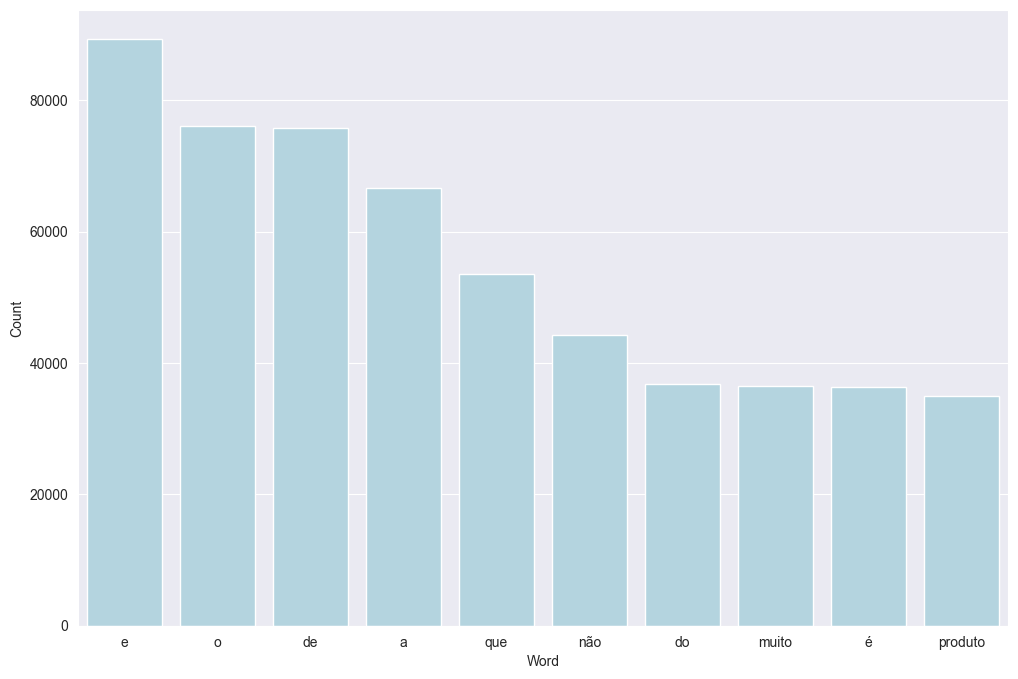

In [213]:
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Word", y="Frequency", data=dataframe_frequency_dist.nlargest(columns="Frequency", n=10), color="lightblue")
ax.set(ylabel="Count")
plt.show()

In [214]:
def chart(data, column, size):
    all_words = ' '.join([text for text in data[column]])
    token_phrase = token_by_whitespace.tokenize(all_words)
    frequency_dist = nltk.FreqDist(token_phrase)
    dataframe_frequency_dist = pd.DataFrame({
        "Word": list(frequency_dist.keys()), 
        "Frequency": list(frequency_dist.values())
    })
    dataframe_frequency_dist = dataframe_frequency_dist.nlargest(columns="Frequency", n=size)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x="Word", y="Frequency", data=dataframe_frequency_dist, color="lightblue")
    ax.set(ylabel="Count")
    plt.show()

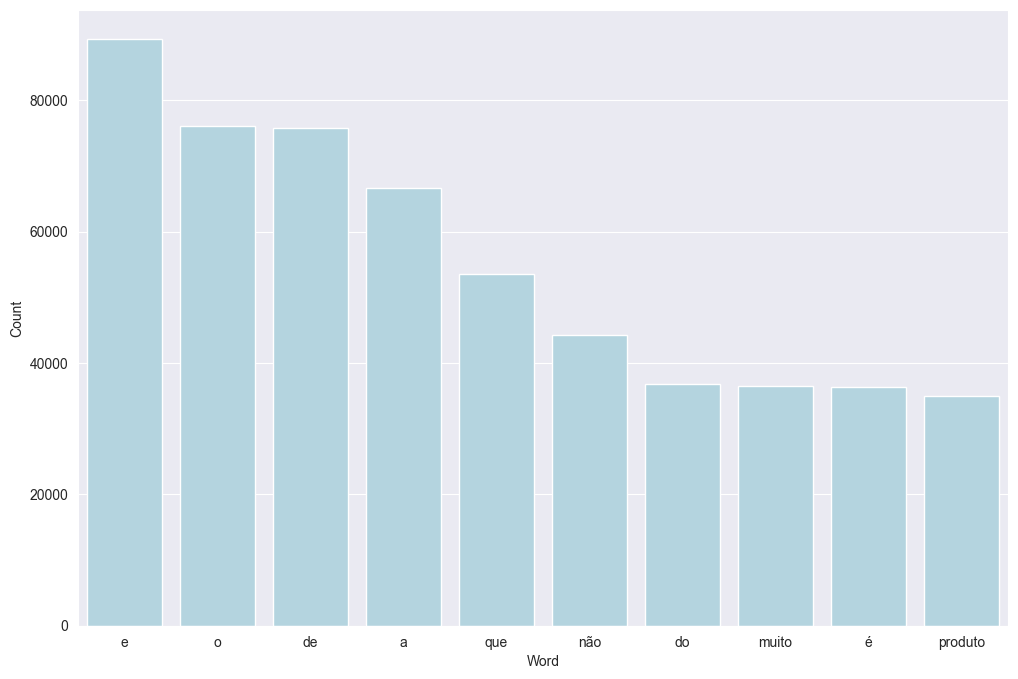

In [215]:
chart(reviews, "review_text", 10)

In [216]:
#Removing stop words
irrelevant_words = nltk.corpus.stopwords.words('portuguese')
irrelevant_words

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [217]:
processed_sentece = list()

for review in reviews.review_text:
    new_sentence = list()
    single_review = token_by_whitespace.tokenize(review)
    
    for word in single_review:
        if word not in irrelevant_words:
            new_sentence.append(word)
    
    processed_sentece.append(' '.join(new_sentence))

reviews['review_without_stopwords'] = processed_sentece

In [218]:
reviews.head()

review_text  \
0                                                                                                  Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar   
1                                                                                                                                       Produto excepcional!  recomendo!!! inovador e gostoso de ler!!   
2                                           recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto   
3  Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.   
5                                                                                                                 ótmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom   

   polarity  \
0       1.0   
1       1.0   
2       0.0   
3       1.0   
5       1.0   

                                                                                                                                                   review_without_stopwords  
0                                                                                   Bem macio felpudo...recomendo. Preço imbatível entrega rápida. Compraria outro precisar  
1                                                                                                                  Produto excepcional! recomendo!!! inovador gostoso ler!!  
2                                                                        recebi produto antes prazo veio defeito trava usar agora Americanas resolveu preciso deste produto  
3  Bom custo beneficio. Adequado pessoas fazem uso casual aparelho . A máquina fotográfica excelente . A tela fornece imagens ótimas . Os recursos aparelho fáceis manejar.  
5                                                                                                    ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom

In [219]:
# train the model again now without stopwords
train_model(reviews, "review_without_stopwords", "polarity")    

0.8823022574530416

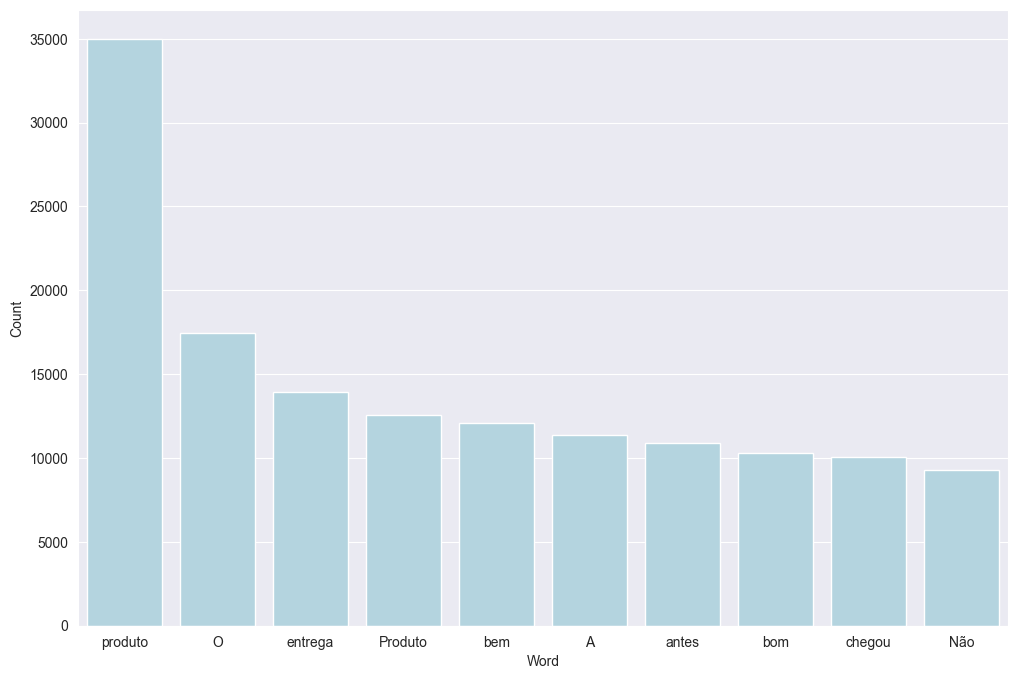

In [220]:
# show chart withoud stopwords
chart(reviews, "review_without_stopwords", 10)

In [221]:
# we can still notice some stops words that are capitalized and punctuated, which are not important for sentiment analysis.
# let's create our custom stop words list
from string import punctuation

custom_punctuation_list = list()
for punct in punctuation:
    custom_punctuation_list.append(punct)
    
    
stop_words_punctuation = irrelevant_words + custom_punctuation_list    
stop_words_punctuation

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [222]:
from nltk import tokenize
token_by_punctuation = tokenize.WordPunctTokenizer()  # use punctuation tokenizer

processed_sentece = list()
for review in reviews.review_without_stopwords:
    new_sentence = list()
    single_review = token_by_punctuation.tokenize(review)
    
    for word in single_review:
        if word not in stop_words_punctuation:
            new_sentence.append(word)
    
    processed_sentece.append(' '.join(new_sentence))

reviews['review_without_stopwords_and_punctuation'] = processed_sentece

reviews.head(20)
# chart(reviews, "review_without_stopwords", 10)

review_text  \
0                                                                                                                                                                                                      Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar   
1                                                                                                                                                                                                                                           Produto excepcional!  recomendo!!! inovador e gostoso de ler!!   
2                                                                                                                                               recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto   
3                                                                                                      Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.   
5                                                                                                                                                                                                                     ótmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom   
6                                                                                                                                                                                                                       GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.   
7                                                                                                                                                                                                                               Adorei, entrega no prazo e produto conforme eu esperava, recomendadíssimo.   
8                                                                                                                                                   Já é o segundo processador deste modelo que compro (o primeiro foi para minha mãe) e só tenho elogios. É muito forte e facilita bastante os processos.   
9                                                                                                                                                                    Nao recebi!!!  endereço para entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!   
10                                                                                                                                                                               Não compra este produto, pois o mesmo veio com os botões travados e ao tentar ligar o mesmo nem ligou. Péssima qualidade.   
11                                                                                                                                                                                                                                      Adorei o smartphone, excelente acabamento, veloz e muito intuitivo   
12                                                                                                                                                                                                                               Tive azar, pois o produto não ligou. Tive que entregar para o fornecedor.   
13                                                                                                                                                          Uma enganação! Esperei quase um mês e cancelaram o pedido. E o produto continua disponível. Nem entraram em contato. Palhaçada!!! #carrodemola   
15                                                         

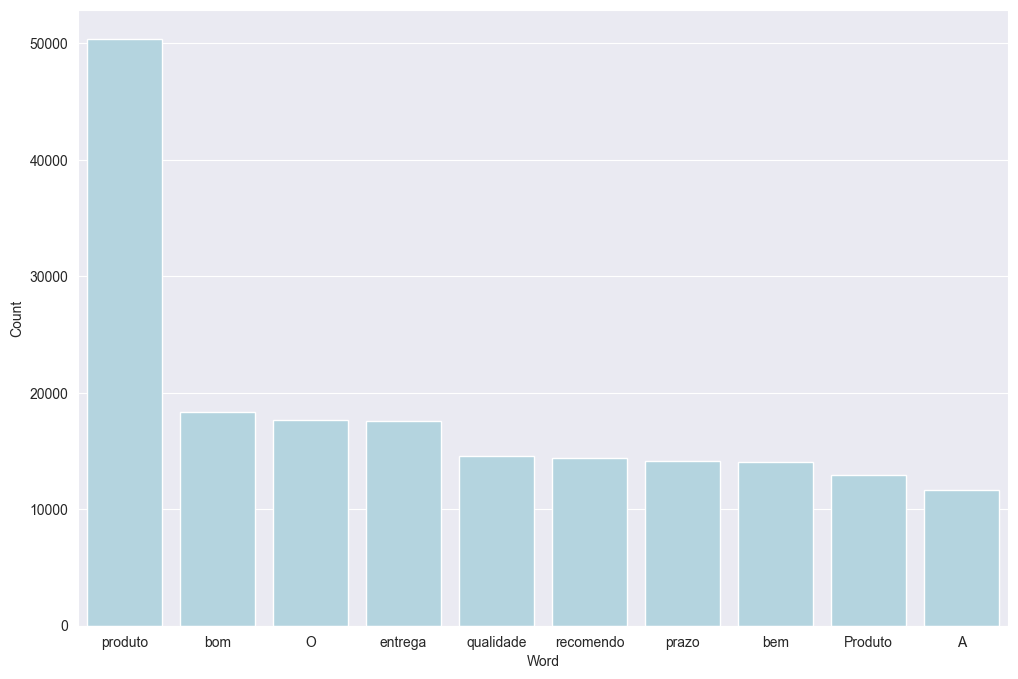

In [223]:
chart(reviews, "review_without_stopwords_and_punctuation", 10)

## Removing Accents and Special Characters

In [224]:
# Examples:
import unidecode

acentos = 'ótimo péssimo não tão é'
test = unidecode.unidecode(acentos) 
test

'otimo pessimo nao tao e'

In [225]:
without_accents = [unidecode.unidecode(text) for text in reviews.review_without_stopwords_and_punctuation]
without_accents[4]

'otmo produto atendeu expectativas entrega ocorreu antes previsto bom'

In [226]:
stop_words_without_accents = [unidecode.unidecode(word) for word in stop_words_punctuation]

reviews['review_without_stopwords_and_punctuation_and_accents'] = without_accents

processed_sentece = list()
for review in reviews.review_without_stopwords_and_punctuation_and_accents:
    new_sentence = list()
    single_review = token_by_punctuation.tokenize(review)

    for word in single_review:
        if word not in stop_words_without_accents:
            new_sentence.append(word)

    processed_sentece.append(' '.join(new_sentence))

reviews['review_without_stopwords_and_punctuation_and_accents'] = processed_sentece

reviews.head(10)

review_text  \
0                                                                                                   Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar   
1                                                                                                                                        Produto excepcional!  recomendo!!! inovador e gostoso de ler!!   
2                                            recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto   
3   Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.   
5                                                                                                                  ótmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom   
6                                                                                                                    GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.   
7                                                                                                                            Adorei, entrega no prazo e produto conforme eu esperava, recomendadíssimo.   
8                                                Já é o segundo processador deste modelo que compro (o primeiro foi para minha mãe) e só tenho elogios. É muito forte e facilita bastante os processos.   
9                                                                 Nao recebi!!!  endereço para entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!   
10                                                                            Não compra este produto, pois o mesmo veio com os botões travados e ao tentar ligar o mesmo nem ligou. Péssima qualidade.   

    polarity  \
0        1.0   
1        1.0   
2        0.0   
3        1.0   
5        1.0   
6        1.0   
7        1.0   
8        1.0   
9        1.0   
10       0.0   

                                                                                                                                                    review_without_stopwords  \
0                                                                                    Bem macio felpudo...recomendo. Preço imbatível entrega rápida. Compraria outro precisar   
1                                                                                                                   Produto excepcional! recomendo!!! inovador gostoso ler!!   
2                                                                         recebi produto antes prazo veio defeito trava usar agora Americanas resolveu preciso deste produto   
3   Bom custo beneficio. Adequado pessoas fazem uso casual aparelho . A máquina fotográfica excelente . A tela fornece imagens ótimas . Os recursos aparelho fáceis manejar.   
5                                                                                                     ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom   
6                                                                                         GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.   
7                                                                                                         Adorei, entrega prazo produto conforme esperava, recomendadíssimo.   
8                                                                  Já segundo processador deste modelo compro (o primeiro mãe) elogios. É forte facilita bastante processos.   
9                                            Nao recebi!!! endereço entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!   
10               

In [227]:

train_model(reviews, "review_without_stopwords_and_punctuation_and_accents", "polarity")

0.8829226262278131

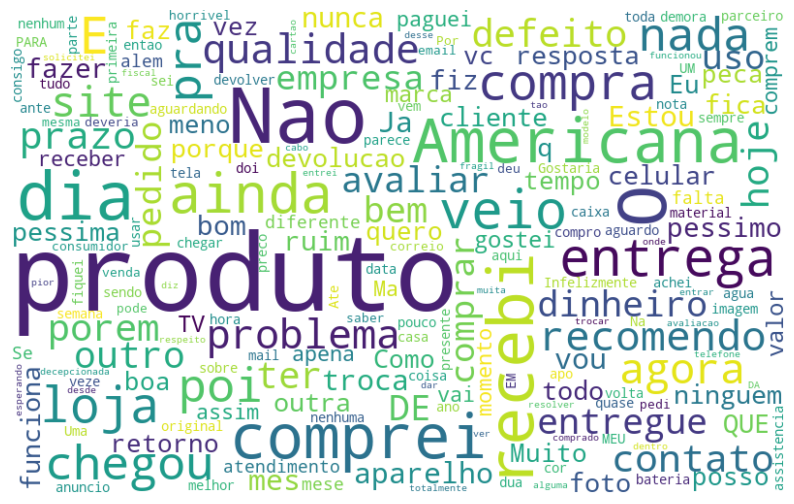

In [228]:
word_cloud_negative(reviews, "review_without_stopwords_and_punctuation_and_accents")

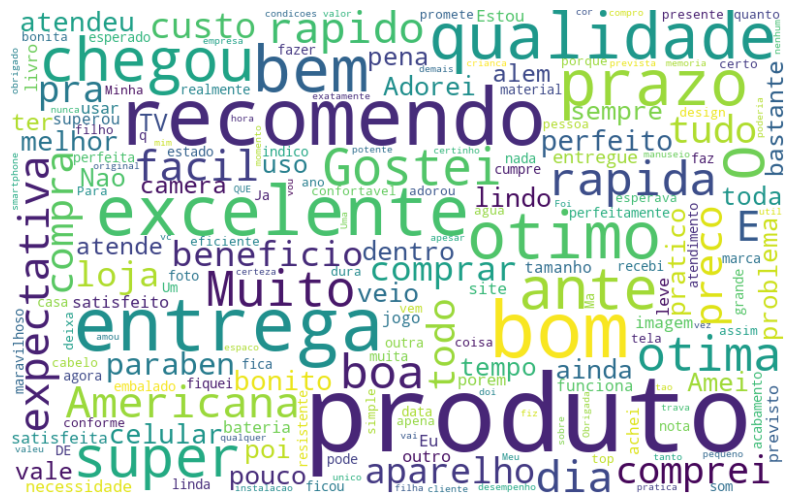

In [229]:
word_cloud_positive(reviews, "review_without_stopwords_and_punctuation_and_accents")

In [230]:
# Removing capitalization

processed_sentece = list()
for review in reviews.review_without_stopwords_and_punctuation_and_accents:
    new_sentence = list()
    review = review.lower() #adding lower case to make it case insensitive
    single_review = token_by_punctuation.tokenize(review)

    for word in single_review:
        if word not in stop_words_without_accents:
            new_sentence.append(word)

    processed_sentece.append(' '.join(new_sentence))

reviews['review_without_stopwords_and_punctuation_and_accents_and_case_insensitive'] = processed_sentece

reviews.head(10)

review_text  \
0                                                                                                   Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar   
1                                                                                                                                        Produto excepcional!  recomendo!!! inovador e gostoso de ler!!   
2                                            recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto   
3   Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.   
5                                                                                                                  ótmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom   
6                                                                                                                    GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.   
7                                                                                                                            Adorei, entrega no prazo e produto conforme eu esperava, recomendadíssimo.   
8                                                Já é o segundo processador deste modelo que compro (o primeiro foi para minha mãe) e só tenho elogios. É muito forte e facilita bastante os processos.   
9                                                                 Nao recebi!!!  endereço para entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!   
10                                                                            Não compra este produto, pois o mesmo veio com os botões travados e ao tentar ligar o mesmo nem ligou. Péssima qualidade.   

    polarity  \
0        1.0   
1        1.0   
2        0.0   
3        1.0   
5        1.0   
6        1.0   
7        1.0   
8        1.0   
9        1.0   
10       0.0   

                                                                                                                                                    review_without_stopwords  \
0                                                                                    Bem macio felpudo...recomendo. Preço imbatível entrega rápida. Compraria outro precisar   
1                                                                                                                   Produto excepcional! recomendo!!! inovador gostoso ler!!   
2                                                                         recebi produto antes prazo veio defeito trava usar agora Americanas resolveu preciso deste produto   
3   Bom custo beneficio. Adequado pessoas fazem uso casual aparelho . A máquina fotográfica excelente . A tela fornece imagens ótimas . Os recursos aparelho fáceis manejar.   
5                                                                                                     ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom   
6                                                                                         GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.   
7                                                                                                         Adorei, entrega prazo produto conforme esperava, recomendadíssimo.   
8                                                                  Já segundo processador deste modelo compro (o primeiro mãe) elogios. É forte facilita bastante processos.   
9                                            Nao recebi!!! endereço entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!   
10               

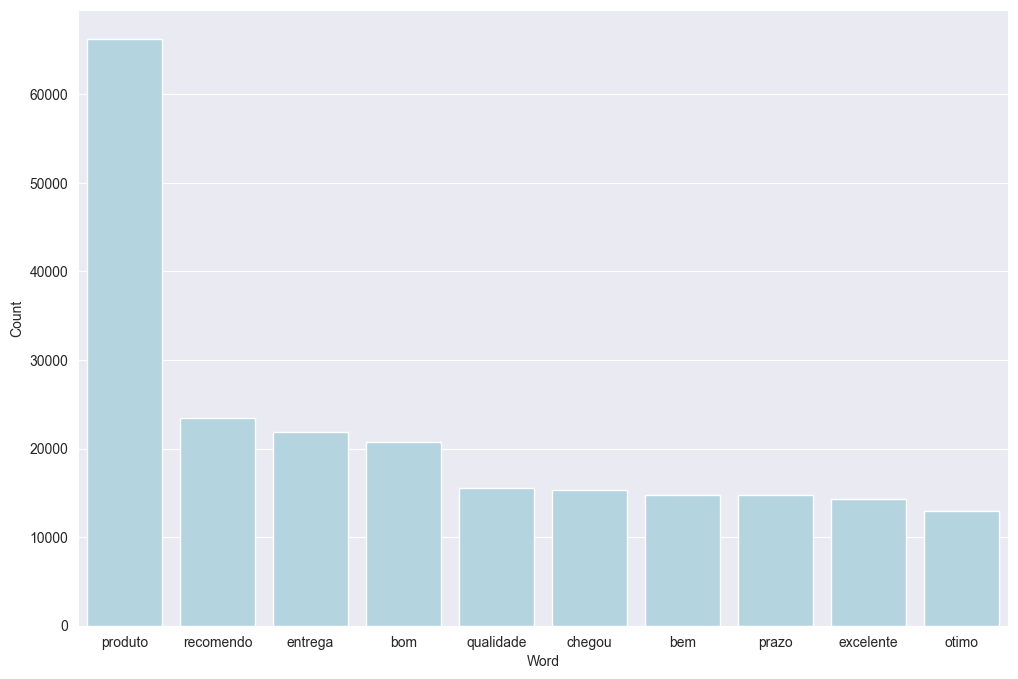

In [231]:
chart(reviews, "review_without_stopwords_and_punctuation_and_accents_and_case_insensitive", 10)

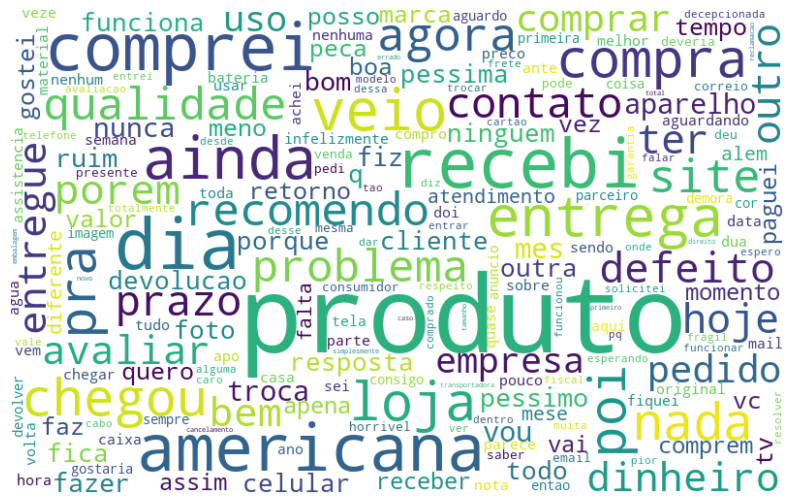

In [232]:
word_cloud_negative(reviews, "review_without_stopwords_and_punctuation_and_accents_and_case_insensitive")

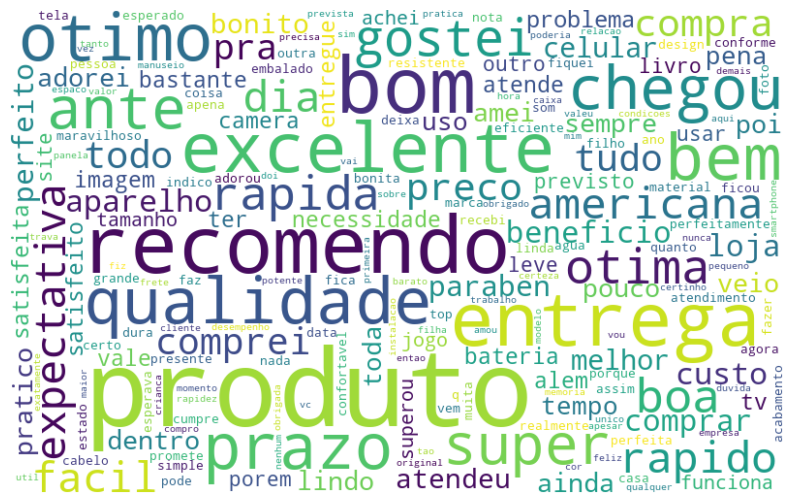

In [233]:
word_cloud_positive(reviews, "review_without_stopwords_and_punctuation_and_accents_and_case_insensitive")

## Stemming RSLP

In [234]:
#example:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('computador')
stemmer.stem('computadores')
stemmer.stem('computando')

'comput'

In [235]:
processed_sentece = list()
for review in reviews.review_without_stopwords_and_punctuation_and_accents:
    new_sentence = list()
    review = review.lower() #adding lower case to make it case insensitive
    single_review = token_by_punctuation.tokenize(review)

    for word in single_review:
        if word not in stop_words_without_accents:
            new_sentence.append(stemmer.stem(word))

    processed_sentece.append(' '.join(new_sentence))

reviews['review_stemmed'] = processed_sentece

reviews.head(10)

review_text  \
0                                                                                                   Bem macio e felpudo...recomendo.  Preço imbatível e entrega rápida. Compraria outro quando precisar   
1                                                                                                                                        Produto excepcional!  recomendo!!! inovador e gostoso de ler!!   
2                                            recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto   
3   Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.   
5                                                                                                                  ótmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom   
6                                                                                                                    GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.   
7                                                                                                                            Adorei, entrega no prazo e produto conforme eu esperava, recomendadíssimo.   
8                                                Já é o segundo processador deste modelo que compro (o primeiro foi para minha mãe) e só tenho elogios. É muito forte e facilita bastante os processos.   
9                                                                 Nao recebi!!!  endereço para entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!   
10                                                                            Não compra este produto, pois o mesmo veio com os botões travados e ao tentar ligar o mesmo nem ligou. Péssima qualidade.   

    polarity  \
0        1.0   
1        1.0   
2        0.0   
3        1.0   
5        1.0   
6        1.0   
7        1.0   
8        1.0   
9        1.0   
10       0.0   

                                                                                                                                                    review_without_stopwords  \
0                                                                                    Bem macio felpudo...recomendo. Preço imbatível entrega rápida. Compraria outro precisar   
1                                                                                                                   Produto excepcional! recomendo!!! inovador gostoso ler!!   
2                                                                         recebi produto antes prazo veio defeito trava usar agora Americanas resolveu preciso deste produto   
3   Bom custo beneficio. Adequado pessoas fazem uso casual aparelho . A máquina fotográfica excelente . A tela fornece imagens ótimas . Os recursos aparelho fáceis manejar.   
5                                                                                                     ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom   
6                                                                                         GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.   
7                                                                                                         Adorei, entrega prazo produto conforme esperava, recomendadíssimo.   
8                                                                  Já segundo processador deste modelo compro (o primeiro mãe) elogios. É forte facilita bastante processos.   
9                                            Nao recebi!!! endereço entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!   
10               

In [236]:
train_model(reviews, "review_stemmed", "polarity")

0.8875753920386007

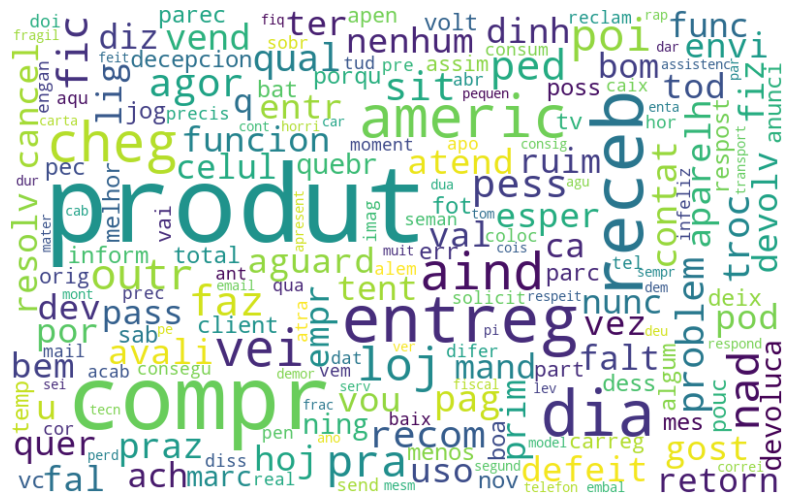

In [237]:
word_cloud_negative(reviews, "review_stemmed")

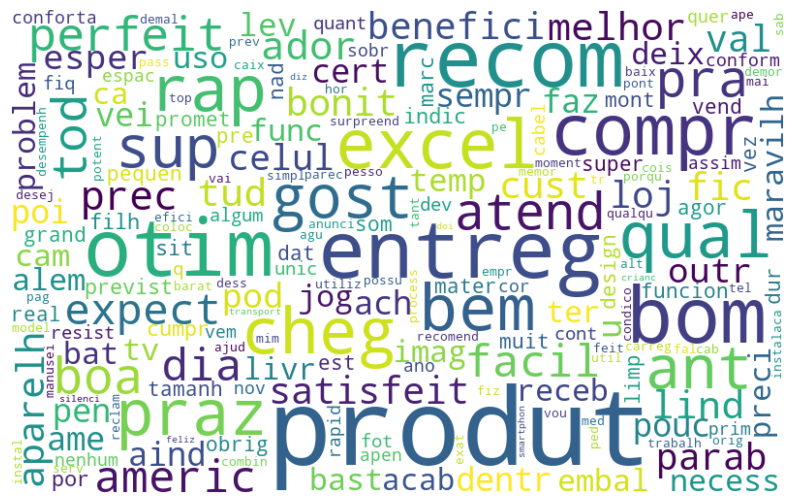

In [238]:
word_cloud_positive(reviews, "review_stemmed")

## TF IDF - Term Frequency – Inverse Document Frequency
TF IDF is used to determine the importance of a word in a document or a collection of documents. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the entire collection or corpus.

In [243]:
#Example:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = ["Este produto é muito bom", "Este produto não é muito bom", "Este produto é excelente"]
tfidf = TfidfVectorizer(lowercase=False, max_features=100)

characteristics = tfidf.fit_transform(sentences)
pd.DataFrame(characteristics.todense(), columns=tfidf.get_feature_names_out())

Este       bom  excelente     muito       não   produto
0  0.433708  0.558478   0.000000  0.558478  0.000000  0.433708
1  0.349578  0.450145   0.000000  0.450145  0.591887  0.349578
2  0.453295  0.000000   0.767495  0.000000  0.000000  0.453295

In [244]:
tfidf_processed = tfidf.fit_transform(reviews.review_stemmed)

train, test, train_class, test_class = train_test_split(tfidf_processed, reviews.polarity, random_state=42, stratify=reviews.polarity)

logistic_regression = LogisticRegression()
logistic_regression.fit(train, train_class)
accuracy_tfidf = logistic_regression.score(test, test_class)
accuracy_tfidf



0.8879545062898501

## NGrams
N-gram is a sequence of  N  items (typically words or characters) that appear consecutively within a given text. N-grams are used to capture and model the statistical relationships between words or characters in order to understand context and meaning in language.

Types of N-grams:

	1.	Unigram (1-gram): Single items, often individual words. For example, in the sentence “I love NLP,” the unigrams are [“I”, “love”, “NLP”].
	2.	Bigram (2-gram): Pairs of consecutive words. For “I love NLP,” the bigrams are [“I love”, “love NLP”].
	3.	Trigram (3-gram): Sequences of three consecutive words. For the sentence above, it would just be [“I love NLP”].


In [245]:
# Example:
from nltk import ngrams

sentence = "Comprei um ótimo carro"
sentence_by_whitespace = token_by_whitespace.tokenize(sentence)
pairs = ngrams(sentence_by_whitespace, 2)
list(pairs)

[('Comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'carro')]

In [247]:
tdidf  = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vector_tfidf = tdidf.fit_transform(reviews.review_stemmed)

train, test, train_class, test_class = train_test_split(vector_tfidf, reviews.polarity, random_state=42, stratify=reviews.polarity) 

logistic_regression = LogisticRegression(max_iter=200)
logistic_regression.fit(train, train_class)
accuracy_tfidf_ngrams = logistic_regression.score(test, test_class)
accuracy_tfidf_ngrams

0.938962605548854

In [249]:
weights = pd.DataFrame(logistic_regression.coef_[0].T, index=tdidf.get_feature_names_out())
weights.nlargest(10, 0)

0
otim       17.767886
excel      16.705401
bom        13.455191
perfeit    10.936559
ador       10.581301
satisfeit   9.042830
rap         8.224463
lind        8.092507
ame         7.665638
maravilh    7.663068

In [250]:
# The inverse of the weights will indicate the negative words
weights.nsmallest(10, 0)

0
pess      -9.660391
ruim      -8.194947
receb     -7.715667
frac      -7.609830
decepcion -7.290175
horri     -7.055259
vei       -6.689639
dinh      -6.207778
fragil    -6.142289
devolv    -6.095038